In [25]:
import pandas as pd

df = pd.read_csv(r"C:\Users\mruga\Desktop\New folder\Capstone Project\AutoShopIQ_Repair_chatbot\Data\Invoices_converted_csv\structured_repair_data.csv")
df.head()


ro_number           make       model    year  mileage_in  mileage_out  \
0          1  Mercedes-Benz  380SL Base  1982.0     90398.0      90399.0   
1          1  Mercedes-Benz  380SL Base  1982.0     90398.0      90399.0   
2          1  Mercedes-Benz  380SL Base  1982.0     90398.0      90399.0   
3          1  Mercedes-Benz  380SL Base  1982.0     90398.0      90399.0   
4          1  Mercedes-Benz  380SL Base  1982.0     90398.0      90399.0   

                   concern job_type  \
0  Used Vehicle Inspection    Brake   
1  Used Vehicle Inspection    Brake   
2  Used Vehicle Inspection    Brake   
3  Used Vehicle Inspection    Brake   
4  Used Vehicle Inspection    Brake   

                                labor_job_info  labor_hours  labor_total_cost  \
0                       R/R Rear Pads & Rotors          1.5             150.0   
1  R/R Right Rear Caliper & Bleed Brake System          1.0             100.0   
2                                          NaN          NaN               NaN   
3                                          NaN          NaN               NaN   
4                                          NaN          NaN               NaN   

  source                                   part_name  part_total_cost  
0  labor                                         NaN              NaN  
1  labor                                         NaN              NaN  
2   part  Brake Pad Set (Rear) Premium Brake Pad Set            99.99  
3   part    Brake Rotors (Rear) Premium Brake Rotors           150.00  
4   part            Cardone Right Rear Brake Caliper           135.75

In [26]:
import pandas as pd

# Load your CSV (update the path to your actual file)
# df = pd.read_csv("structured_repair_data.csv")

# Normalize by stripping spaces and converting to lowercase for consistent grouping
df['job_type_norm'] = df['job_type'].astype(str).str.strip().str.lower()
df['labor_job_info_norm'] = df['labor_job_info'].astype(str).str.strip().str.lower()
df['part_name_norm'] = df['part_name'].astype(str).str.strip().str.lower()

# Count unique values after normalization
job_type_counts = df['job_type_norm'].value_counts().reset_index()
job_type_counts.columns = ['job_type_normalized', 'count']

labor_info_counts = df['labor_job_info_norm'].value_counts().reset_index()
labor_info_counts.columns = ['labor_job_info_normalized', 'count']

part_name_counts = df['part_name_norm'].value_counts().reset_index()
part_name_counts.columns = ['part_name_normalized', 'count']

# Display DataFrames
print("üîß Normalized Unique Job Types:")
display(job_type_counts)

print("üß∞ Normalized Unique Labor Job Info:")
display(labor_info_counts)

print("üß© Normalized Unique Part Names:")
display(part_name_counts)


üîß Normalized Unique Job Types:


job_type_normalized  count
0                  oil change  10834
1                       brake   5184
2            brake inspection   2552
3          general diagnostic   2096
4                        diag   1288
...                       ...    ...
1862     fender liner install      1
1863        lic. plae install      1
1864          evap smoke test      1
1865  door handle lock repair      1
1866             brake system      1

[1867 rows x 2 columns]

üß∞ Normalized Unique Labor Job Info:


labor_job_info_normalized  count
0                                                   nan  30432
1                                                 oil c   1189
2                                      oil change labor   1017
3                         r/r front brake pads & rotors    586
4                                            oil change    575
...                                                 ...    ...
4850  remove catalytic converter, replace rear flang...      1
4851     r & r torque rod mount, and transmission mount      1
4852                      possible oil smell /// rattle      1
4853                         r & r a/c belt & tensioner      1
4854          r&r ignition module (fender wall mounted)      1

[4855 rows x 2 columns]

üß© Normalized Unique Part Names:


part_name_normalized  count
0                                                   nan  21205
1                                   standard oil filter   1453
2                        oil filter standard oil filter   1411
3                           synthetic oil syn motor oil    955
4                            syn blend motor oil sb-101    911
...                                                 ...    ...
4355                             monroe strut/coil assy      1
4356                         act1455 ceramic brake pads      1
4357                      autozone power steering fluid      1
4358  cardone reman remanufactured rack and pinion a...      1
4359                           motorcraft starter relay      1

[4360 rows x 2 columns]

In [27]:
import pandas as pd
from rapidfuzz import fuzz

# # Load your CSV (update the path to your actual file)
# df = pd.read_csv("structured_repair_data.csv")

# Normalize by stripping spaces and converting to lowercase for consistent grouping
df['job_type_norm'] = df['job_type'].astype(str).str.strip().str.lower()
df['labor_job_info_norm'] = df['labor_job_info'].astype(str).str.strip().str.lower()
df['part_name_norm'] = df['part_name'].astype(str).str.strip().str.lower()

# Count unique values after normalization
job_type_counts = df['job_type_norm'].value_counts().reset_index()
job_type_counts.columns = ['job_type_normalized', 'count']

labor_info_counts = df['labor_job_info_norm'].value_counts().reset_index()
labor_info_counts.columns = ['labor_job_info_normalized', 'count']

part_name_counts = df['part_name_norm'].value_counts().reset_index()
part_name_counts.columns = ['part_name_normalized', 'count']

# Display DataFrames
print("üîß Normalized Unique Job Types:")
display(job_type_counts)

print("üß∞ Normalized Unique Labor Job Info:")
display(labor_info_counts)

print("üß© Normalized Unique Part Names:")
display(part_name_counts)

# Helper function to get similar terms using fuzzy matching
def get_similar_terms(base_term, choices, threshold=85, top_n=10):
    matches = [(desc, fuzz.ratio(base_term, desc)) for desc in choices if pd.notna(desc)]
    filtered = sorted([m for m in matches if m[1] >= threshold], key=lambda x: x[1], reverse=True)
    return pd.DataFrame(filtered[:top_n], columns=["matched_term", "similarity_score"])

# Apply fuzzy matching to top labor and part terms
top_labor_terms = [term for term in labor_info_counts['labor_job_info_normalized'].head(10).tolist() if pd.notna(term)]
top_part_terms = [term for term in part_name_counts['part_name_normalized'].head(10).tolist() if pd.notna(term)]

# Merge similar labor terms
similar_labor_mapping = {}
for base in top_labor_terms:
    matches_df = get_similar_terms(base, labor_info_counts['labor_job_info_normalized'])
    for match in matches_df['matched_term']:
        similar_labor_mapping[match] = base

# Apply the mapping to create a standardized labor job info column
df['labor_job_info_grouped'] = df['labor_job_info_norm'].map(similar_labor_mapping).fillna(df['labor_job_info_norm'])

# Compare number of unique labor job info values
original_count = df['labor_job_info_norm'].nunique()
grouped_count = df['labor_job_info_grouped'].nunique()

print(f"\nüîÅ Labor Job Info - Original Unique Count: {original_count}")
print(f"üîÅ Labor Job Info - Grouped Unique Count: {grouped_count}")


üîß Normalized Unique Job Types:


job_type_normalized  count
0                  oil change  10834
1                       brake   5184
2            brake inspection   2552
3          general diagnostic   2096
4                        diag   1288
...                       ...    ...
1862     fender liner install      1
1863        lic. plae install      1
1864          evap smoke test      1
1865  door handle lock repair      1
1866             brake system      1

[1867 rows x 2 columns]

üß∞ Normalized Unique Labor Job Info:


labor_job_info_normalized  count
0                                                   nan  30432
1                                                 oil c   1189
2                                      oil change labor   1017
3                         r/r front brake pads & rotors    586
4                                            oil change    575
...                                                 ...    ...
4850  remove catalytic converter, replace rear flang...      1
4851     r & r torque rod mount, and transmission mount      1
4852                      possible oil smell /// rattle      1
4853                         r & r a/c belt & tensioner      1
4854          r&r ignition module (fender wall mounted)      1

[4855 rows x 2 columns]

üß© Normalized Unique Part Names:


part_name_normalized  count
0                                                   nan  21205
1                                   standard oil filter   1453
2                        oil filter standard oil filter   1411
3                           synthetic oil syn motor oil    955
4                            syn blend motor oil sb-101    911
...                                                 ...    ...
4355                             monroe strut/coil assy      1
4356                         act1455 ceramic brake pads      1
4357                      autozone power steering fluid      1
4358  cardone reman remanufactured rack and pinion a...      1
4359                           motorcraft starter relay      1

[4360 rows x 2 columns]


üîÅ Labor Job Info - Original Unique Count: 4855
üîÅ Labor Job Info - Grouped Unique Count: 4827


In [29]:
top_labor_terms = [term for term in labor_info_counts['labor_job_info_normalized'].head(4000).tolist() if pd.notna(term)]
top_part_terms = [term for term in part_name_counts['part_name_normalized'].head(10).tolist() if pd.notna(term)]

# Merge similar labor terms
similar_labor_mapping = {}
for base in top_labor_terms:
    matches_df = get_similar_terms(base, labor_info_counts['labor_job_info_normalized'])
    for match in matches_df['matched_term']:
        similar_labor_mapping[match] = base

# Apply the mapping to create a standardized labor job info column
df['labor_job_info_grouped'] = df['labor_job_info_norm'].map(similar_labor_mapping).fillna(df['labor_job_info_norm'])

# Compare number of unique labor job info values
original_count = df['labor_job_info_norm'].nunique()
grouped_count = df['labor_job_info_grouped'].nunique()

print(f"\nüîÅ Labor Job Info - Original Unique Count: {original_count}")
print(f"üîÅ Labor Job Info - Grouped Unique Count: {grouped_count}")

KeyboardInterrupt: 

In [28]:
top_labor_terms = [term for term in labor_info_counts['labor_job_info_normalized'].head(100).tolist() if pd.notna(term)]
top_part_terms = [term for term in part_name_counts['part_name_normalized'].head(100).tolist() if pd.notna(term)]

# Merge similar labor terms
similar_labor_mapping = {}
for base in top_labor_terms:
    matches_df = get_similar_terms(base, labor_info_counts['labor_job_info_normalized'])
    for match in matches_df['matched_term']:
        similar_labor_mapping[match] = base

# Apply the mapping to create a standardized labor job info column
df['labor_job_info_grouped'] = df['labor_job_info_norm'].map(similar_labor_mapping).fillna(df['labor_job_info_norm'])

# Compare number of unique labor job info values
original_count_labor = df['labor_job_info_norm'].nunique()
grouped_count_labor = df['labor_job_info_grouped'].nunique()

print(f"\nüîÅ Labor Job Info - Original Unique Count: {original_count_labor}")
print(f"üîÅ Labor Job Info - Grouped Unique Count: {grouped_count_labor}")

# Merge similar part names
similar_part_mapping = {}
for base in top_part_terms:
    matches_df = get_similar_terms(base, part_name_counts['part_name_normalized'])
    for match in matches_df['matched_term']:
        similar_part_mapping[match] = base

# Apply the mapping to create a standardized part name column
df['part_name_grouped'] = df['part_name_norm'].map(similar_part_mapping).fillna(df['part_name_norm'])

# Compare number of unique part name values
original_count_parts = df['part_name_norm'].nunique()
grouped_count_parts = df['part_name_grouped'].nunique()

print(f"\nüîÅ Part Name - Original Unique Count: {original_count_parts}")
print(f"üîÅ Part Name - Grouped Unique Count: {grouped_count_parts}")



üîÅ Labor Job Info - Original Unique Count: 4855
üîÅ Labor Job Info - Grouped Unique Count: 4727

üîÅ Part Name - Original Unique Count: 4360
üîÅ Part Name - Grouped Unique Count: 4103


In [30]:
df[['labor_job_info_norm', 'labor_job_info_grouped']].drop_duplicates().head(20)


labor_job_info_norm  \
0                              r/r rear pads & rotors   
1         r/r right rear caliper & bleed brake system   
2                                                 nan   
5                                    r/r front shocks   
6                                     r/r rear shocks   
7                     replace left rear sway bar link   
11                                         oil change   
14                              caliper slide service   
15                            replace blown cig. fuse   
41                                  r/r pads & rotors   
44               air conditioning expansion valve r&r   
45  air conditioning refrigerant temperature senso...   
48  install custom mufflers (supplied) weld as req...   
52                   install front calipers and hoses   
55                           replace center resonator   
69                         replace left front caliper   
72                      replace muffler and tail pipe   
76                            r/r front pads & rotors   
78                       r/r rear brake pads & rotors   
83                                   oil change labor   

                               labor_job_info_grouped  
0                                   r/r pads & rotors  
1         r/r right rear caliper & bleed brake system  
2                                                 nan  
5                                    r/r front shocks  
6                                     r/r rear shocks  
7                     replace left rear sway bar link  
11                                         oil change  
14                              caliper slide service  
15                            replace blown cig. fuse  
41                                  r/r pads & rotors  
44               air conditioning expansion valve r&r  
45  air conditioning refrigerant temperature senso...  
48  install custom mufflers (supplied) weld as req...  
52                   install front calipers and hoses  
55                           replace center resonator  
69                         replace left front caliper  
72                      replace muffler and tail pipe  
76                                  r/r pads & rotors  
78                         r/r rear brake pad & rotor  
83                                   oil change labor

In [34]:
top_labor_terms = [term for term in labor_info_counts['labor_job_info_normalized'].head(100).tolist() if pd.notna(term)]
top_part_terms = [term for term in part_name_counts['part_name_normalized'].head(100).tolist() if pd.notna(term)]

# Merge similar labor terms
similar_labor_mapping = {}
for base in top_labor_terms:
    matches_df = get_similar_terms(base, labor_info_counts['labor_job_info_normalized'])
    for match in matches_df['matched_term']:
        similar_labor_mapping[match] = base

# Apply the mapping to create a standardized labor job info column
df['labor_job_info_grouped'] = df['labor_job_info_norm'].map(similar_labor_mapping).fillna(df['labor_job_info_norm'])

# Compare number of unique labor job info values
original_count_labor = df['labor_job_info_norm'].nunique()
grouped_count_labor = df['labor_job_info_grouped'].nunique()

print(f"\nüîÅ Labor Job Info - Original Unique Count: {original_count_labor}")
print(f"üîÅ Labor Job Info - Grouped Unique Count: {grouped_count_labor}")

# Merge similar part names
similar_part_mapping = {}
for base in top_part_terms:
    matches_df = get_similar_terms(base, part_name_counts['part_name_normalized'])
    for match in matches_df['matched_term']:
        similar_part_mapping[match] = base

# Apply the mapping to create a standardized part name column
df['part_name_grouped'] = df['part_name_norm'].map(similar_part_mapping).fillna(df['part_name_norm'])

# Compare number of unique part name values
original_count_parts = df['part_name_norm'].nunique()
grouped_count_parts = df['part_name_grouped'].nunique()

print(f"\nüîÅ Part Name - Original Unique Count: {original_count_parts}")
print(f"üîÅ Part Name - Grouped Unique Count: {grouped_count_parts}")

# =========================
# Association Rule Mining Setup
# =========================
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Group by RO number and aggregate related info
grouped_df = df.groupby("ro_number").agg({
    "concern": lambda x: list(set(x.dropna())),
    "labor_job_info_grouped": lambda x: list(set(x.dropna())),
    "part_name_grouped": lambda x: list(set(x.dropna()))
}).reset_index()

# Combine concern, labor, and parts into one transaction
grouped_df["transaction"] = grouped_df["concern"] + grouped_df["labor_job_info_grouped"] + grouped_df["part_name_grouped"]

# Remove empty or NaN items from the list
grouped_df["transaction"] = grouped_df["transaction"].apply(lambda x: [i for i in x if pd.notna(i) and str(i).strip().lower() != 'nan'])

# Transform to format for mlxtend
te = TransactionEncoder()
te_ary = te.fit(grouped_df["transaction"]).transform(grouped_df["transaction"])
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Run Apriori to get frequent itemsets and rules
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display top rules
print("\nüìä Top Association Rules:")
display(rules.sort_values("confidence", ascending=False).head(20))



üîÅ Labor Job Info - Original Unique Count: 4855
üîÅ Labor Job Info - Grouped Unique Count: 4727

üîÅ Part Name - Original Unique Count: 4360
üîÅ Part Name - Grouped Unique Count: 4103

üìä Top Association Rules:


antecedents  \
116  (r/r rear brake pad & rotor, brake rotor package)   
189  (r/r rear brake pad & rotor, BRAKE INSPECTION,...   
106     (caliper slide service, brake pad set package)   
234  (r/r rear brake pad & rotor, brake rotor packa...   
183  (BRAKE INSPECTION, brake pad set package, r&r ...   
200  (conventional oil motor oil, OIL CHANGE, oil f...   
244  (remove tires and inspect brakes, brake rotor ...   
223  (brake rotor package, r&r front brake pads & r...   
40            (front brake rotor package brake rotors)   
228  (r/r rear brake pad & rotor, brake rotor packa...   
181  (rear brake rotor package brake rotors, r/r pa...   
190  (r/r rear brake pad & rotor, BRAKE INSPECTION,...   
174              (rear brake rotor, r/r pads & rotors)   
155  (front brake rotor package brake rotors, r/r p...   
61           (BRAKE INSPECTION, brake pad set package)   
123  (remove tires and inspect brakes, brake pad se...   
109  (brake pad set package, labor, remove tires an...   
112  (brake pad set package, r&r front brake pads &...   
111  (brake rotor package, r&r front brake pads & r...   
62             (BRAKE INSPECTION, brake rotor package)   

                                     consequents  antecedent support  \
116                      (brake pad set package)            0.045066   
189                        (brake rotor package)            0.010131   
106                        (brake rotor package)            0.010830   
234                      (brake pad set package)            0.020437   
183                        (brake rotor package)            0.010655   
200                           (oil change labor)            0.010131   
244                      (brake pad set package)            0.011354   
223                      (brake pad set package)            0.011354   
40   (front brake pad set package brake pad set)            0.012926   
228                      (brake pad set package)            0.012052   
181   (rear brake pad set package brake pad set)            0.011703   
190                      (brake pad set package)            0.010131   
174                         (rear brake pad set)            0.010131   
155  (front brake pad set package brake pad set)            0.012576   
61                         (brake rotor package)            0.015721   
123                        (brake rotor package)            0.019563   
109                        (brake rotor package)            0.018690   
112                        (brake rotor package)            0.049432   
111                      (brake pad set package)            0.049432   
62                       (brake pad set package)            0.015895   

     consequent support   support  confidence       lift  representativity  \
116            0.077555  0.045066    1.000000  12.894144               1.0   
189            0.077555  0.010131    1.000000  12.894144               1.0   
106            0.077555  0.010830    1.000000  12.894144               1.0   
234            0.077555  0.020437    1.000000  12.894144               1.0   
183            0.077555  0.010655    1.000000  12.894144               1.0   
200            0.095546  0.010131    1.000000  10.466179               1.0   
244            0.077555  0.011354    1.000000  12.894144               1.0   
223            0.077555  0.011354    1.000000  12.894144               1.0   
40             0.013450  0.012926    1.000000  74.350649               1.0   
228            0.077555  0.012052    1.000000  12.894144               1.0   
181            0.012576  0.011703    1.000000  79.513889               1.0   
190            0.077555  0.010131    1.000000  12.894144               1.0   
174            0.016070  0.010131    1.000000  62.228261               1.0   
155            0.013450  0.012576    1.000000  74.350649               1.0   
61             0.077555  0.015721    1.000000  12.894144               1.0   
123            0.077555  0.019389    0.991071  12.779018       

In [35]:

display(rules.sort_values("confidence", ascending=False).head(20))


antecedents  \
116  (r/r rear brake pad & rotor, brake rotor package)   
189  (r/r rear brake pad & rotor, BRAKE INSPECTION,...   
106     (caliper slide service, brake pad set package)   
234  (r/r rear brake pad & rotor, brake rotor packa...   
183  (BRAKE INSPECTION, brake pad set package, r&r ...   
200  (conventional oil motor oil, OIL CHANGE, oil f...   
244  (remove tires and inspect brakes, brake rotor ...   
223  (brake rotor package, r&r front brake pads & r...   
40            (front brake rotor package brake rotors)   
228  (r/r rear brake pad & rotor, brake rotor packa...   
181  (rear brake rotor package brake rotors, r/r pa...   
190  (r/r rear brake pad & rotor, BRAKE INSPECTION,...   
174              (rear brake rotor, r/r pads & rotors)   
155  (front brake rotor package brake rotors, r/r p...   
61           (BRAKE INSPECTION, brake pad set package)   
123  (remove tires and inspect brakes, brake pad se...   
109  (brake pad set package, labor, remove tires an...   
112  (brake pad set package, r&r front brake pads &...   
111  (brake rotor package, r&r front brake pads & r...   
62             (BRAKE INSPECTION, brake rotor package)   

                                     consequents  antecedent support  \
116                      (brake pad set package)            0.045066   
189                        (brake rotor package)            0.010131   
106                        (brake rotor package)            0.010830   
234                      (brake pad set package)            0.020437   
183                        (brake rotor package)            0.010655   
200                           (oil change labor)            0.010131   
244                      (brake pad set package)            0.011354   
223                      (brake pad set package)            0.011354   
40   (front brake pad set package brake pad set)            0.012926   
228                      (brake pad set package)            0.012052   
181   (rear brake pad set package brake pad set)            0.011703   
190                      (brake pad set package)            0.010131   
174                         (rear brake pad set)            0.010131   
155  (front brake pad set package brake pad set)            0.012576   
61                         (brake rotor package)            0.015721   
123                        (brake rotor package)            0.019563   
109                        (brake rotor package)            0.018690   
112                        (brake rotor package)            0.049432   
111                      (brake pad set package)            0.049432   
62                       (brake pad set package)            0.015895   

     consequent support   support  confidence       lift  representativity  \
116            0.077555  0.045066    1.000000  12.894144               1.0   
189            0.077555  0.010131    1.000000  12.894144               1.0   
106            0.077555  0.010830    1.000000  12.894144               1.0   
234            0.077555  0.020437    1.000000  12.894144               1.0   
183            0.077555  0.010655    1.000000  12.894144               1.0   
200            0.095546  0.010131    1.000000  10.466179               1.0   
244            0.077555  0.011354    1.000000  12.894144               1.0   
223            0.077555  0.011354    1.000000  12.894144               1.0   
40             0.013450  0.012926    1.000000  74.350649               1.0   
228            0.077555  0.012052    1.000000  12.894144               1.0   
181            0.012576  0.011703    1.000000  79.513889               1.0   
190            0.077555  0.010131    1.000000  12.894144               1.0   
174            0.016070  0.010131    1.000000  62.228261               1.0   
155            0.013450  0.012576    1.000000  74.350649               1.0   
61             0.077555  0.015721    1.000000  12.894144               1.0   
123            0.077555  0.019389    0.991071  12.779018       

In [36]:
display(rules.sort_values("lift", ascending=False).head(20))
display(rules.sort_values("support", ascending=False).head(20))


antecedents  \
182         (rear brake pad set package brake pad set)   
181  (rear brake rotor package brake rotors, r/r pa...   
157  (r/r pads & rotors, front brake pad set packag...   
158           (front brake rotor package brake rotors)   
155  (front brake rotor package brake rotors, r/r p...   
40            (front brake rotor package brake rotors)   
159        (front brake pad set package brake pad set)   
41         (front brake pad set package brake pad set)   
176            (r/r pads & rotors, rear brake pad set)   
177                                 (rear brake rotor)   
174              (rear brake rotor, r/r pads & rotors)   
178                               (rear brake pad set)   
53                                  (rear brake rotor)   
54                                (rear brake pad set)   
39                               (front brake pad set)   
38                                 (front brake rotor)   
180  (rear brake pad set package brake pad set, r/r...   
145                                 (conventional oil)   
142                     (oil filter, oil change labor)   
55          (rear brake pad set package brake pad set)   

                                           consequents  antecedent support  \
182  (rear brake rotor package brake rotors, r/r pa...            0.012576   
181         (rear brake pad set package brake pad set)            0.011703   
157           (front brake rotor package brake rotors)            0.012926   
158  (r/r pads & rotors, front brake pad set packag...            0.012926   
155        (front brake pad set package brake pad set)            0.012576   
40         (front brake pad set package brake pad set)            0.012926   
159  (front brake rotor package brake rotors, r/r p...            0.013450   
41            (front brake rotor package brake rotors)            0.013450   
176                                 (rear brake rotor)            0.010306   
177            (r/r pads & rotors, rear brake pad set)            0.015546   
174                               (rear brake pad set)            0.010131   
178              (rear brake rotor, r/r pads & rotors)            0.016070   
53                                (rear brake pad set)            0.015546   
54                                  (rear brake rotor)            0.016070   
39                                 (front brake rotor)            0.017467   
38                               (front brake pad set)            0.016769   
180            (rear brake rotor package brake rotors)            0.012052   
145                     (oil filter, oil change labor)            0.016070   
142                                 (conventional oil)            0.020611   
55             (rear brake rotor package brake rotors)            0.012576   

     consequent support   support  confidence       lift  representativity  \
182            0.011703  0.011703    0.930556  79.513889               1.0   
181            0.012576  0.011703    1.000000  79.513889               1.0   
157            0.012926  0.012576    0.972973  75.273923               1.0   
158            0.012926  0.012576    0.972973  75.273923               1.0   
155            0.013450  0.012576    1.000000  74.350649               1.0   
40             0.013450  0.012926    1.000000  74.350649               1.0   
159            0.012576  0.012576    0.935065  74.350649               1.0   
41             0.012926  0.012926    0.961039  74.350649               1.0   
176            0.015546  0.010131    0.983051  63.235574               1.0   
177            0.010306  0.010131    0.651685  63.235574               1.0   
174            0.016070  0.010131    1.000000  62.228261               1.0   
178            0.010131  0.010131    0.630435  62.228261               1.0   
53             0.016070  0.015371    0.988764  61.529067               1.0   
54             0.015546  0.015371    0.956522  61.529067               1.0   
39             

antecedents  \
10                               (standard oil filter)   
18                               (brake rotor package)   
19                             (brake pad set package)   
34                        (conventional oil motor oil)   
35                                  (oil change labor)   
7                                              (oil c)   
49                   (oil filter  standard oil filter)   
48                       (synthetic oil syn motor oil)   
45                                             (oil c)   
3                        (No customer concerns found.)   
2                      (No technician concerns found.)   
29                     (r&r front brake pads & rotors)   
28                               (brake rotor package)   
22                     (r&r front brake pads & rotors)   
21                             (brake pad set package)   
111  (brake rotor package, r&r front brake pads & r...   
110       (brake rotor package, brake pad set package)   
115                    (r&r front brake pads & rotors)   
114                            (brake pad set package)   
112  (brake pad set package, r&r front brake pads &...   

                                           consequents  antecedent support  \
10                                        (OIL CHANGE)            0.152664   
18                             (brake pad set package)            0.077555   
19                               (brake rotor package)            0.077555   
34                                  (oil change labor)            0.077380   
35                        (conventional oil motor oil)            0.095546   
7                                         (OIL CHANGE)            0.120349   
49                       (synthetic oil syn motor oil)            0.135197   
48                   (oil filter  standard oil filter)            0.069345   
45                               (standard oil filter)            0.120349   
3                      (No technician concerns found.)            0.055371   
2                        (No customer concerns found.)            0.057991   
29                               (brake rotor package)            0.067948   
28                     (r&r front brake pads & rotors)            0.077555   
22                             (brake pad set package)            0.067948   
21                     (r&r front brake pads & rotors)            0.077555   
111                            (brake pad set package)            0.049432   
110                    (r&r front brake pads & rotors)            0.076332   
115       (brake rotor package, brake pad set package)            0.067948   
114  (brake rotor package, r&r front brake pads & r...            0.077555   
112                              (brake rotor package)            0.049432   

     consequent support   support  confidence       lift  representativity  \
10             0.189345  0.089083    0.583524   3.081804               1.0   
18             0.077555  0.076332    0.984234  12.690858               1.0   
19             0.077555  0.076332    0.984234  12.690858               1.0   
34             0.095546  0.074061    0.957111  10.017291               1.0   
35             0.077380  0.074061    0.775137  10.017291               1.0   
7              0.189345  0.071441    0.593614   3.135092               1.0   
49             0.069345  0.067598    0.500000   7.210327               1.0   
48             0.135197  0.067598    0.974811   7.210327               1.0   
45             0.152664  0.062183    0.516691   3.384502               1.0   
3              0.057991  0.052576    0.949527  16.373617               1.0   
2              0.055371  0.052576    0.906627  16.373617               1.0   
29             0.077555  0.049432    0.727506   9.380573               1.0   
28             0.067948  0.049432    0.637387   9.380573               1.0   
22             0.077555  0.049432    0.727506   9.380573               1.0   
21             

In [38]:
concern_keywords = ['noise', 'check', 'leak', 'diagnostic', 'vibration']
rules_concern = rules[rules['antecedents'].apply(lambda x: any(k in str(x).lower() for k in concern_keywords))]
display(rules_concern.sort_values("confidence", ascending=False).head(10))


antecedents  \
102  (visually inspect exhaust system for leaks, ex...   
103  (visually inspect exhaust system for leaks, ab...   
1                                       (EXHAUST LEAK)   

                                     consequents  antecedent support  \
102                               (ab&s adapter)            0.015721   
103                               (exhaust weld)            0.016070   
1    (visually inspect exhaust system for leaks)            0.046812   

     consequent support   support  confidence       lift  representativity  \
102            0.026900  0.010655    0.677778  25.196609               1.0   
103            0.026725  0.010655    0.663043  24.809960               1.0   
1              0.071616  0.027249    0.582090   8.127958               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
102  0.010232    3.019967       0.975650  0.333333   0.668871    0.536941  
103  0.010226    2.888429       0.975368  0.331522   0.653791    0.530868  
1    0.023896    2.221491       0.920037  0.298851   0.549852    0.481289

c:\Users\mruga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mruga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mruga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


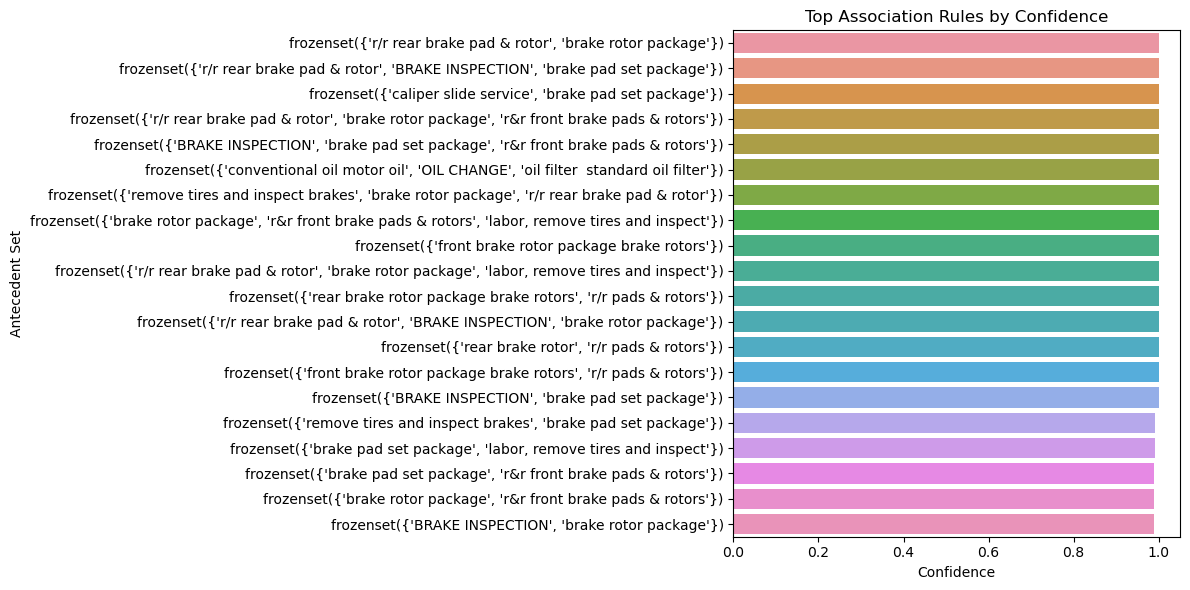

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

top_rules = rules.sort_values("confidence", ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rules, x="confidence", y=top_rules["antecedents"].astype(str))
plt.title("Top Association Rules by Confidence")
plt.xlabel("Confidence")
plt.ylabel("Antecedent Set")
plt.tight_layout()
plt.show()


In [ ]:
top_labor_terms = [term for term in labor_info_counts['labor_job_info_normalized'].head(100).tolist() if pd.notna(term)]
top_part_terms = [term for term in part_name_counts['part_name_normalized'].head(100).tolist() if pd.notna(term)]

# Merge similar labor terms
similar_labor_mapping = {}
for base in top_labor_terms:
    matches_df = get_similar_terms(base, labor_info_counts['labor_job_info_normalized'])
    for match in matches_df['matched_term']:
        similar_labor_mapping[match] = base

# Apply the mapping to create a standardized labor job info column
df['labor_job_info_grouped'] = df['labor_job_info_norm'].map(similar_labor_mapping).fillna(df['labor_job_info_norm'])

# Compare number of unique labor job info values
original_count_labor = df['labor_job_info_norm'].nunique()
grouped_count_labor = df['labor_job_info_grouped'].nunique()

print(f"\nüîÅ Labor Job Info - Original Unique Count: {original_count_labor}")
print(f"üîÅ Labor Job Info - Grouped Unique Count: {grouped_count_labor}")

# Merge similar part names
similar_part_mapping = {}
for base in top_part_terms:
    matches_df = get_similar_terms(base, part_name_counts['part_name_normalized'])
    for match in matches_df['matched_term']:
        similar_part_mapping[match] = base

# Apply the mapping to create a standardized part name column
df['part_name_grouped'] = df['part_name_norm'].map(similar_part_mapping).fillna(df['part_name_norm'])

# Compare number of unique part name values
original_count_parts = df['part_name_norm'].nunique()
grouped_count_parts = df['part_name_grouped'].nunique()

print(f"\nüîÅ Part Name - Original Unique Count: {original_count_parts}")
print(f"üîÅ Part Name - Grouped Unique Count: {grouped_count_parts}")

# =========================
# Association Rule Mining Setup
# =========================
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Group by RO number and aggregate related info
grouped_df = df.groupby("ro_number").agg({
    "concern": lambda x: list(set(x.dropna())),
    "labor_job_info_grouped": lambda x: list(set(x.dropna())),
    "part_name_grouped": lambda x: list(set(x.dropna()))
}).reset_index()

# Combine concern, labor, and parts into one transaction
grouped_df["transaction"] = grouped_df["concern"] + grouped_df["labor_job_info_grouped"] + grouped_df["part_name_grouped"]

# Remove empty or NaN items from the list
grouped_df["transaction"] = grouped_df["transaction"].apply(lambda x: [i for i in x if pd.notna(i) and str(i).strip().lower() != 'nan'])

# Transform to format for mlxtend
te = TransactionEncoder()
te_ary = te.fit(grouped_df["transaction"]).transform(grouped_df["transaction"])
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Run Apriori to get frequent itemsets and rules
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display top rules
print("üìä Top Association Rules Based on Concerns:")
# Prompt user for concern keywords interactively
user_input = input("Enter concern keywords separated by commas (e.g., check, noise, diagnostic): ")
concern_keywords = [kw.strip().lower() for kw in user_input.split(',') if kw.strip()]

# Filter rules based on user-defined keywords
rules_filtered = rules[rules['antecedents'].apply(lambda x: any(k in str(x).lower() for k in concern_keywords))]]
display(rules_filtered.sort_values("confidence", ascending=False).head(20))

# Export rules and cost stats
# 1. Concern ‚Üí Job Rules
concern_to_jobs = rules[rules['antecedents'].apply(lambda x: any(k in str(x).lower() for k in concern_keywords)) &
                        rules['consequents'].apply(lambda x: any('labor' in str(x).lower()))]
import os
output_dir = r"C:\Users\mruga\Desktop\New folder\Capstone Project\AutoShopIQ_Repair_chatbot\Data\association_rule_mining"
os.makedirs(output_dir, exist_ok=True)

concern_to_jobs.to_csv(os.path.join(output_dir, "concern_to_jobs_rules.csv"), index=False)

# 2. Job ‚Üí Part Rules
job_to_parts = rules[rules['antecedents'].apply(lambda x: any('labor' in str(x).lower())) & rules['consequents'].apply(lambda x: any('part' in str(x).lower()))]
job_to_parts.to_csv(os.path.join(output_dir, "job_to_parts_rules.csv"), index=False)

# 3. Cost Stats by Concern
cost_stats = df.groupby("concern")[["labor_total_cost", "part_total_cost"]].agg(["mean", "median", "count"]).dropna()
cost_stats.to_json(os.path.join(output_dir, "concern_to_cost_stats.json"), orient='index')

print("‚úÖ Exported concern/job/part rules and cost stats.")


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 88)

In [32]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.7/1.4 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 12.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.2/11.1 MB 25.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/11.1 MB 29.3 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.1 MB 27.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.9/11.1 MB 26.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.1 MB 24.3 MB/s eta 0:00:01
   --------------------- ------------------ 6.1/11.1 MB 22.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.9/11.1 MB 22.1 MB/s eta 0:00:01
   ----

In [14]:
pip install rapidfuzz


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 660.6 kB/s eta 0:00:03
   ------------- -------------------------- 0.6/1.6 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 11.5 MB/s eta 0:00:00
